In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

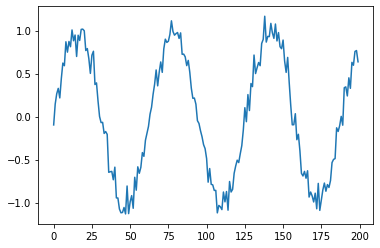

In [2]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1 # 싸인 함수 

plt.plot(series)
plt.show()

In [3]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [4]:
print(X[0])
print(Y[0])

[-0.0970618   0.14485649  0.26581473  0.32800099  0.21700757  0.44093545
  0.62228666  0.59171337  0.87018363  0.74956004]
0.8738373680463257


In [5]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Yshape", Y.shape) # X의 쉐입의 두번째는 피쳐를 의미. 10개의 피쳐를 통해 Y를 예측할 것

X shape (190, 10) Yshape (190,)


In [6]:
# autoregressive linear model 자동으로 regression을 만들어주는 모델...?
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x) # 입력과 출력레이어
model.compile(loss='mse', optimizer=Adam(lr=0.1))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 190 -> 0 ~ 95
r = model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data=(X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.4133 - val_loss: 0.3470
Epoch 2/100
95/95 [==============================] - 0s 63us/sample - loss: 0.3627 - val_loss: 0.0934
Epoch 3/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0833 - val_loss: 0.1579
Epoch 4/100
95/95 [==============================] - 0s 53us/sample - loss: 0.1996 - val_loss: 0.0794
Epoch 5/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0473 - val_loss: 0.0838
Epoch 6/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0990 - val_loss: 0.0931
Epoch 7/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0646 - val_loss: 0.0458
Epoch 8/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0590 - val_loss: 0.0822
Epoch 9/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0503 - val_loss: 0.0336
Epoch 10/100
95/95 [===================

95/95 [==============================] - 0s 53us/sample - loss: 0.0130 - val_loss: 0.0151
Epoch 81/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0129 - val_loss: 0.0149
Epoch 82/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0145 - val_loss: 0.0158
Epoch 83/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0124 - val_loss: 0.0155
Epoch 84/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0146 - val_loss: 0.0149
Epoch 85/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0133 - val_loss: 0.0149
Epoch 86/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0135 - val_loss: 0.0151
Epoch 87/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0122 - val_loss: 0.0150
Epoch 88/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0130 - val_loss: 0.0151
Epoch 89/100
95/95 [==============================] - 0s 74us/sample - loss: 0.0129 - 

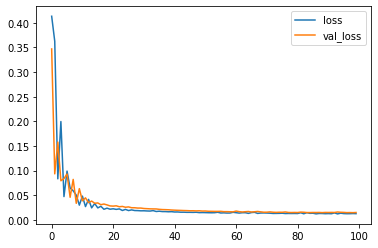

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# incorrect
validation_target = Y[-N//2:]
validation_predict = []
i = -N//2
while len(validation_predict) < len(validation_target):
    #
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 배열형태라서 0콤마0을 통해 단일값으로 가져올 수 있다 1x1 -> scalar
    i += 1
    
    validation_predict.append(p)

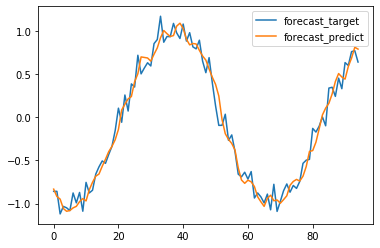

In [10]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predict, label='forecast_predict')
plt.legend()

In [11]:
#correct
validation_target = Y[-N//2:]
validation_predict = []

last_x = X[-N//2]


i = -N//2
print("X[95]=", X[-N//2])
print("X[96]=", X[-N//2 +1])

while len(validation_predict) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] # 1X1 -> scalar
    
    validation_predict.append(p)
    
    print("new X=", X[i], ", p=",p)
    i+=1
    
    # p -> predict value
#     last_x = [] #new caculated value
    #[A,B,C,D,....,X]
    #[B,C,D,.....,X, [A,B,C,D,....,X] ]
    #last_x(last value) -> p
    
     # np.roll()
    print("Before:", last_x)
    last_x = np.roll(last_x, -1)
    print("After:", last_x)
    
    last_x[-1] = p

    

X[95]= [-0.0796741  -0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354
 -0.76288173 -0.60419849 -0.7877133  -0.79397392]
X[96]= [-0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354 -0.76288173
 -0.60419849 -0.7877133  -0.79397392 -0.85875899]
new X= [-0.0796741  -0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354
 -0.76288173 -0.60419849 -0.7877133  -0.79397392] , p= -0.83309215
Before: [-0.0796741  -0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354
 -0.76288173 -0.60419849 -0.7877133  -0.79397392]
After: [-0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354 -0.76288173
 -0.60419849 -0.7877133  -0.79397392 -0.0796741 ]
new X= [-0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354 -0.76288173
 -0.60419849 -0.7877133  -0.79397392 -0.85875899] , p= -0.9101638
Before: [-0.16441371 -0.23420358 -0.32616002 -0.37238713 -0.48882354 -0.76288173
 -0.60419849 -0.7877133  -0.79397392 -0.83309215]
After: [-0.23420358 -0.32616002 -0.37238713 -0.48882354

new X= [-0.49806562 -0.48867698 -0.13061955 -0.1728019  -0.10525857  0.00238226
 -0.10018152  0.33592593  0.34539094  0.24005683] , p= -0.35589233
Before: [-0.69448876 -0.6799832  -0.66041988 -0.63603628 -0.60710126 -0.57390386
 -0.53675383 -0.49598974 -0.45198429 -0.40514269]
After: [-0.6799832  -0.66041988 -0.63603628 -0.60710126 -0.57390386 -0.53675383
 -0.49598974 -0.45198429 -0.40514269 -0.69448876]
new X= [-0.48867698 -0.13061955 -0.1728019  -0.10525857  0.00238226 -0.10018152
  0.33592593  0.34539094  0.24005683  0.45074378] , p= -0.30467096
Before: [-0.6799832  -0.66041988 -0.63603628 -0.60710126 -0.57390386 -0.53675383
 -0.49598974 -0.45198429 -0.40514269 -0.35589233]
After: [-0.66041988 -0.63603628 -0.60710126 -0.57390386 -0.53675383 -0.49598974
 -0.45198429 -0.40514269 -0.35589233 -0.6799832 ]
new X= [-0.13061955 -0.1728019  -0.10525857  0.00238226 -0.10018152  0.33592593
  0.34539094  0.24005683  0.45074378  0.32861438] , p= -0.25191963
Before: [-0.66041988 -0.63603628 -0.6

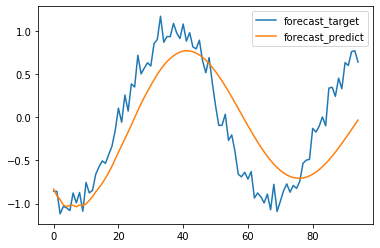

In [12]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predict, label='forecast_predict')
plt.legend()